# Somalia Water Sources Dataset – Step-by-Step Analysis

This notebook performs a complete EDA (Exploratory Data Analysis) on the Somalia
Water Sources dataset.  
It includes:

### ✔ Univariate Analysis  
- Categorical counts  
- Numeric distributions  
- Missing values summary  

### ✔ Bivariate Analysis  
- Categorical vs categorical  
- Numeric vs numeric  
- Numeric vs categorical  

### ✔ Multivariate Analysis  
- Correlation matrix  
- PCA (optional)

We proceed step-by-step with explanations and visualizations.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (edit path if needed)
df = pd.read_csv("SWIMS_LiveMap_Dataset_20241016-105351.csv", low_memory=False)

df.head()


,code,water_source_type,inspecting_agency,inspection_date,region,district,source_name,nearest_settlement_name,distance_to_settlement,establishing_agency,...,cost_of_water_for_humans,animals_charged_for_water,cost_of_water_for_livestock,name_of_operator,operator_contact_number,last_intervention_agency,last_intervention_description,last_intervention_date,additional_notes,metadata_tag
0,BKHRBE032,Berkad,SWALIM Archives,2005-02-22,Hiraan,Belet Weyne,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Sources Data from Partners – WSD_Pat
1,DMTGBC014,Dam,SWALIM_WSIS,2008-06-21,Togdheer,Burco,Balli Dhiig 1,Bali Dhiig,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Sources Inventory Survey – WSIS
2,DMTGBC017,Dam,SWALIM_WSIS,2008-06-21,Togdheer,Burco,Warta Nasiye,Nasiye,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Sources Inventory Survey – WSIS
3,DWMDHO018,Dug Well,BRCiS,2017-06-01,Mudug,Hobyo,Toro,Toro,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non portable water,Water Sources Data from Partners – WSD_Pat
4,BHBRQR024,Borehole,SWALIM_WSIS,2008-06-03,Bari,Qardho,Yako,Yako,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Sources Inventory Survey – WSIS


## 🔍 Step 1 — Initial Data Overview

Before analysis, we need to inspect:
- Number of rows and columns
- Column names
- Basic preview of the dataset

This helps us understand what variables are available.


In [22]:
print("Dataset shape:", df.shape)

print("\nColumn names:")
print(list(df.columns))

df.sample(5)


Dataset shape: (8307, 94)

Column names:
['code', 'water_source_type', 'inspecting_agency', 'inspection_date', 'region', 'district', 'source_name', 'nearest_settlement_name', 'distance_to_settlement', 'establishing_agency', 'date_source_established', 'latitude', 'longitude', 'elevation', 'gps_precision', 'sources_cluster', 'users', 'permanent', 'months_used', 'functioning', 'reason_for_non_functioning', 'number_of_human_using_source', 'number_of_camel_using_source', 'number_of_cattle_using_source', 'number_of_shoats_using_source', 'number_of_hectares_irrigated_using_source', 'source_protected', 'bh_depth', 'casing_type', 'casing_size', 'bh_static_water_level', 'bh_operating_yield', 'bh_operating_hrs_per_day', 'bh_operating_draw_down', 'bh_recovery_time', 'dw_depth', 'dw_static_water_level', 'dw_yield', 'dw_operating_hours', 'dw_draw_down', 'recovery_time', 'spring_cumulative_discharge_rate', 'dam_depth', 'dam_length', 'dam_width', 'berkad_depth', 'berkad_length', 'berkad_width', 'other

,code,water_source_type,inspecting_agency,inspection_date,region,district,source_name,nearest_settlement_name,distance_to_settlement,establishing_agency,...,cost_of_water_for_humans,animals_charged_for_water,cost_of_water_for_livestock,name_of_operator,operator_contact_number,last_intervention_agency,last_intervention_description,last_intervention_date,additional_notes,metadata_tag
7507,NaN,Borehole,Galmudug Ministry of Energy and Water Resources,2022-03-28,Galgaduud,cabudwaaq,Ceelka taakulo,Horseed,0.75,Hormuud,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5059,DWSNCR063,Dug Well,SWALIM_HGS,2012-02-01,Sanaag,Ceerigaabo,Ceel La Q oday satelite 1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amado limestone aquifer,Hydrogeological Survey and Assessment of Selec...
1778,DWTGSH019,Dug Well,SWALIM_WSIS,2008-05-17,Togdheer,Sheikh,Dhadhin Tuggo dug well 2,Sheikh,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Action Aid,NaN,2001-01-28,NaN,Water Sources Inventory Survey – WSIS
7119,NaN,Dug Well,FGS Ministry of Energy and Water Resources,2022-03-21,Middle Shabelle,jowhar,Barow,Barow,0.00,Former Somali Government,...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5092,DWSNCR125,Dug Well,SWALIM_HGS,2012-02-20,Sanaag,Ceerigaabo,Caduur/CEEW051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taleh formation,Hydrogeological Survey and Assessment of Selec...


## 🧹 Step 2 — Missing Values Analysis

Understanding missing values helps decide:
- which columns are usable
- which require cleaning or imputation

We compute missing percentage for each column.


In [23]:
missing = pd.DataFrame({
    "column": df.columns,
    "missing_count": df.isna().sum(),
    "missing_pct": (df.isna().mean() * 100).round(2)
}).sort_values("missing_pct", ascending=False)

missing.head(20)


,column,missing_count,missing_pct
other_length,other_length,8306,99.99
other_depth,other_depth,8306,99.99
operator_contact_number,operator_contact_number,8283,99.71
other_source_yield,other_source_yield,8277,99.64
other_width,other_width,8260,99.43
spring_cumulative_discharge_rate,spring_cumulative_discharge_rate,8255,99.37
recovery_time,recovery_time,8147,98.07
berkad_depth,berkad_depth,8103,97.54
cost_of_water_for_livestock,cost_of_water_for_livestock,8101,97.52
berkad_length,berkad_length,8098,97.48


## 🧩 Step 3 — Identify Numeric and Categorical Columns

We detect:
- Important categorical columns (region, district, water source type)
- Numeric columns (depth, yield, pH, EC, lat, lon)

These will be used for univariate and bivariate analysis.


In [24]:
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]
numeric_cols = [col for col in df.columns if df[col].dtype != "object"]

categorical_cols[:15], numeric_cols[:15]


(['code',
  'water_source_type',
  'inspecting_agency',
  'inspection_date',
  'region',
  'district',
  'source_name',
  'nearest_settlement_name',
  'establishing_agency',
  'date_source_established',
  'users',
  'permanent',
  'functioning',
  'reason_for_non_functioning',
  'source_protected'],
 ['distance_to_settlement',
  'latitude',
  'longitude',
  'elevation',
  'gps_precision',
  'sources_cluster',
  'months_used',
  'number_of_human_using_source',
  'number_of_camel_using_source',
  'number_of_cattle_using_source',
  'number_of_shoats_using_source',
  'number_of_hectares_irrigated_using_source',
  'bh_depth',
  'casing_size',
  'bh_static_water_level'])

# 🟦 Step 4 — Univariate Analysis: Categorical Variables

We analyze the distribution of key categorical variables:
- Region
- District
- Water Source Type
- Functional Status

We use frequency tables + bar charts.

This shows which categories are most common.



=== REGION ===
region
Woqooyi Galbeed    1059
Togdheer            767
Sanaag              707
Mudug               646
Bari                623
Awdal               614
Galgaduud           613
Sool                545
Bay                 503
Bakool              464
Name: count, dtype: int64


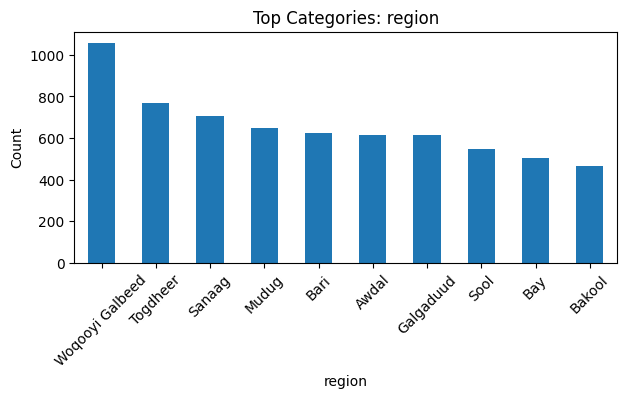


=== DISTRICT ===
district
Hargeisa      475
Burco         348
Ceerigaabo    333
Bossaso       262
Baydhaba      256
Borama        249
Garoowe       244
Gebiley       213
Afgooye       199
Hobyo         194
Name: count, dtype: int64


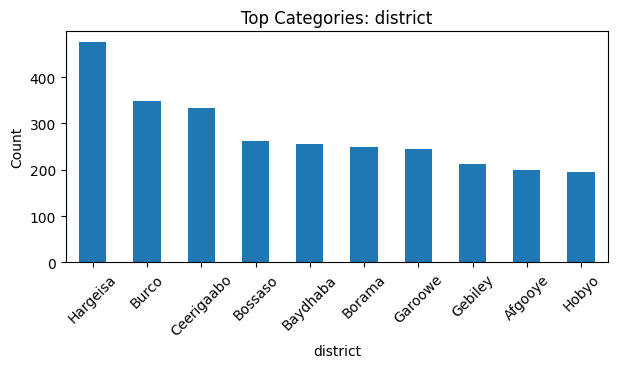


=== WATER_SOURCE_TYPE ===
water_source_type
Dug Well        3538
Borehole        3133
Dam              634
Spring           490
Berkad           446
Others_Togga      64
other              1
Dug well           1
Name: count, dtype: int64


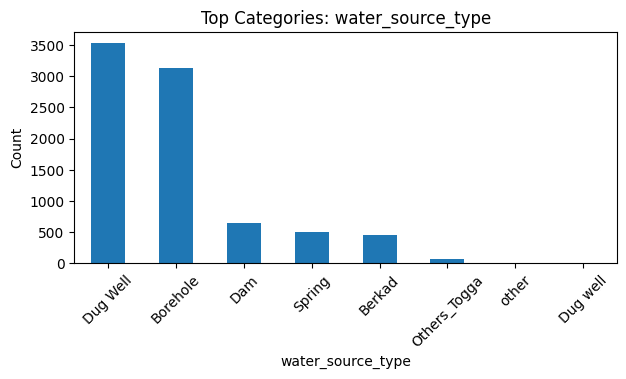

In [25]:
important_cats = ["region", "district", "water_source_type", "functional_status"]

for col in important_cats:
    if col in df.columns:
        print(f"\n=== {col.upper()} ===")
        print(df[col].value_counts().head(10))
        
        df[col].value_counts().head(10).plot(kind="bar", figsize=(7,3))
        plt.title(f"Top Categories: {col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


# 🟩 Step 5 — Univariate Analysis: Numeric Variables

For numeric variables, we examine:
- Histograms (distribution)
- Boxplots (outliers)

This helps understand ranges and data quality.


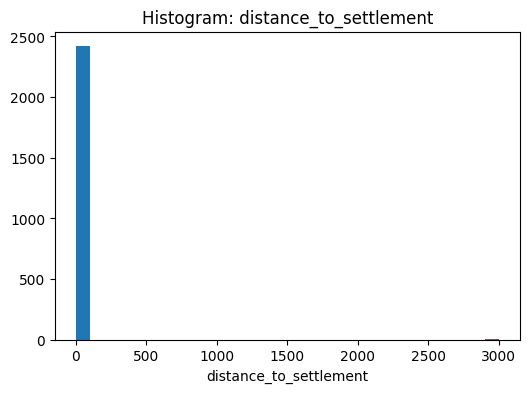

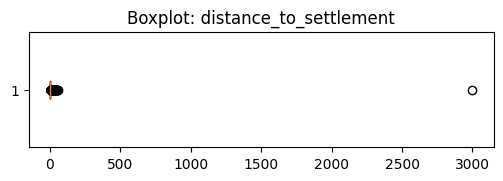

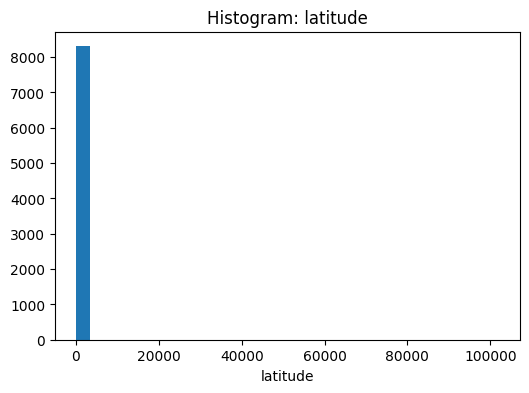

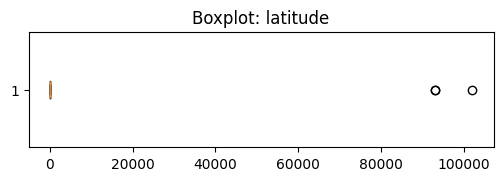

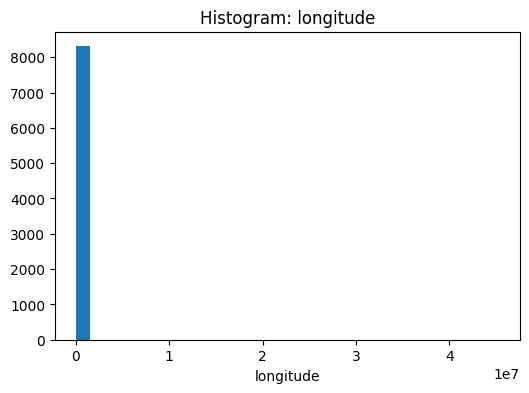

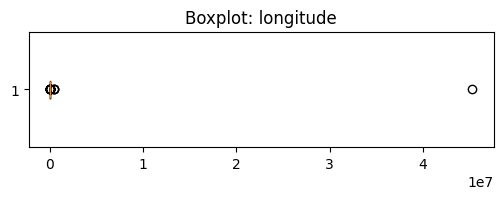

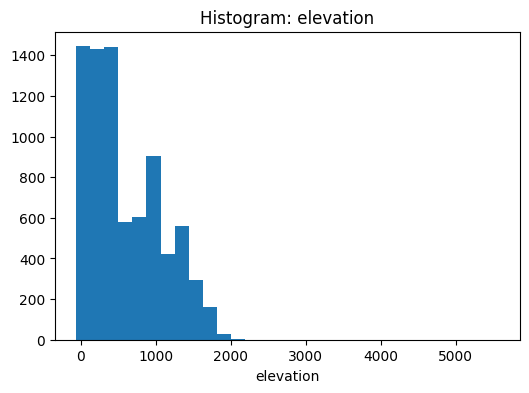

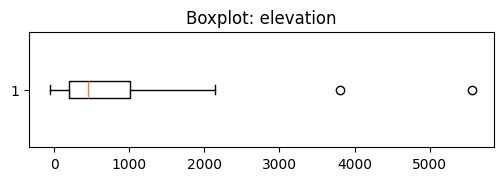

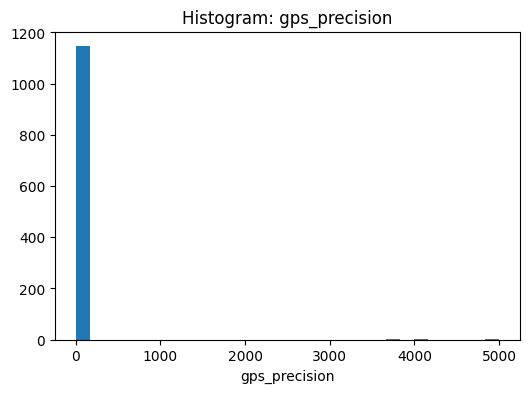

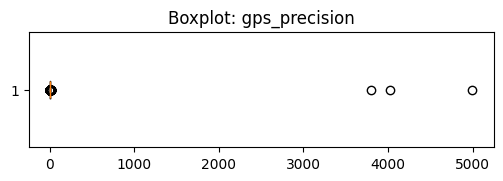

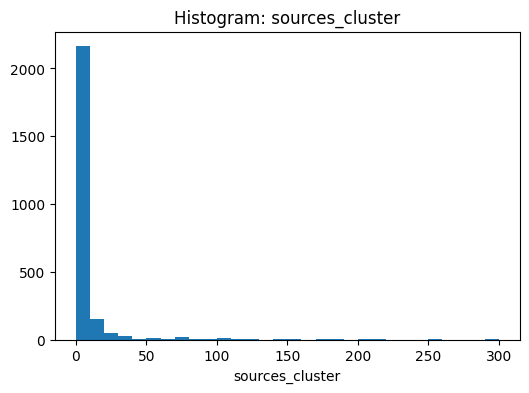

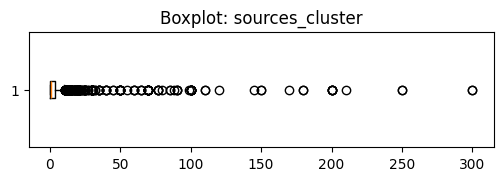

In [26]:
for col in numeric_cols[:6]:  # first 6 numeric columns
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.show()

    plt.figure(figsize=(6,1.5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot: {col}")
    plt.show()


# 🟧 Step 6 — Bivariate Analysis: Categorical vs Categorical

We analyze the relationship between:
### **Region × Water Source Type**

This shows the distribution of water source types by region.


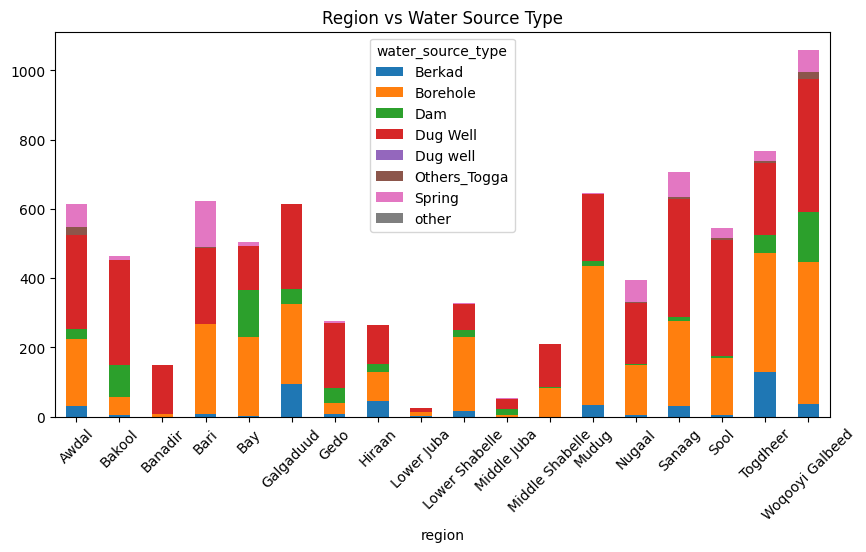

In [27]:
if "region" in df.columns and "water_source_type" in df.columns:
    ct = pd.crosstab(df["region"], df["water_source_type"])
    ct.head()

    ct.plot(kind="bar", stacked=True, figsize=(10,5))
    plt.title("Region vs Water Source Type")
    plt.xticks(rotation=45)
    plt.show()


# 🟥 Step 7 — Bivariate Analysis: Numeric vs Numeric

If available, we analyze relationships such as:
- depth vs yield
- pH vs EC
- elevation vs depth

We use scatter plots.


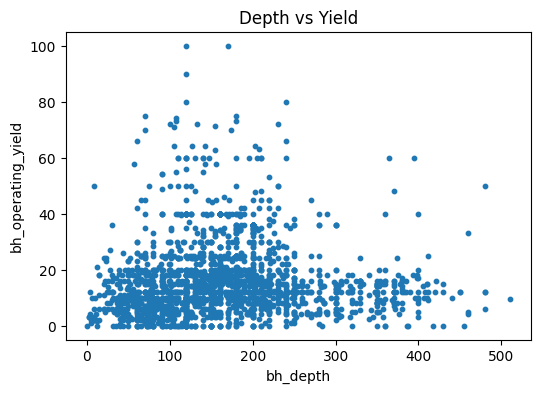

In [28]:
# Automate detection of "depth" & "yield"
depth_col = next((c for c in df.columns if 'depth' in c.lower()), None)
yield_col = next((c for c in df.columns if 'yield' in c.lower()), None)

if depth_col and yield_col:
    plt.figure(figsize=(6,4))
    plt.scatter(df[depth_col], df[yield_col], s=10)
    plt.xlabel(depth_col)
    plt.ylabel(yield_col)
    plt.title("Depth vs Yield")
    plt.show()


# 🟪 Step 8 — Numeric vs Categorical

Example:
### Depth grouped by water source type

We use boxplots to compare categories.


<Figure size 1000x400 with 0 Axes>

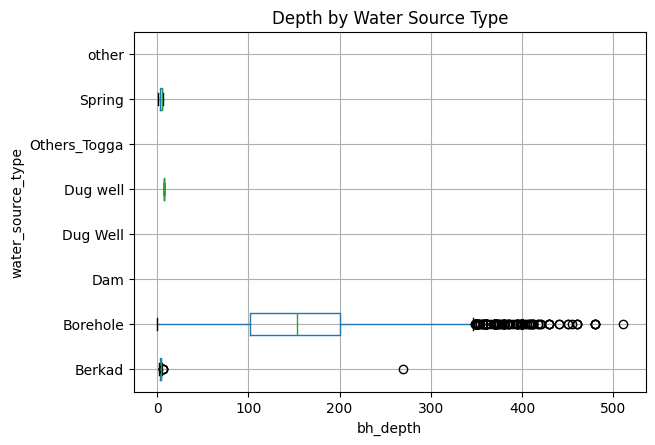

In [29]:
if depth_col and "water_source_type" in df.columns:
    plt.figure(figsize=(10,4))
    df.boxplot(column=depth_col, by="water_source_type", vert=False)
    plt.title("Depth by Water Source Type")
    plt.suptitle("")
    plt.xlabel(depth_col)
    plt.show()


# 🔵 Step 9 — Multivariate Analysis: Correlation Matrix

We compute correlations between numeric variables to detect:
- strong positive/negative relationships
- redundant variables


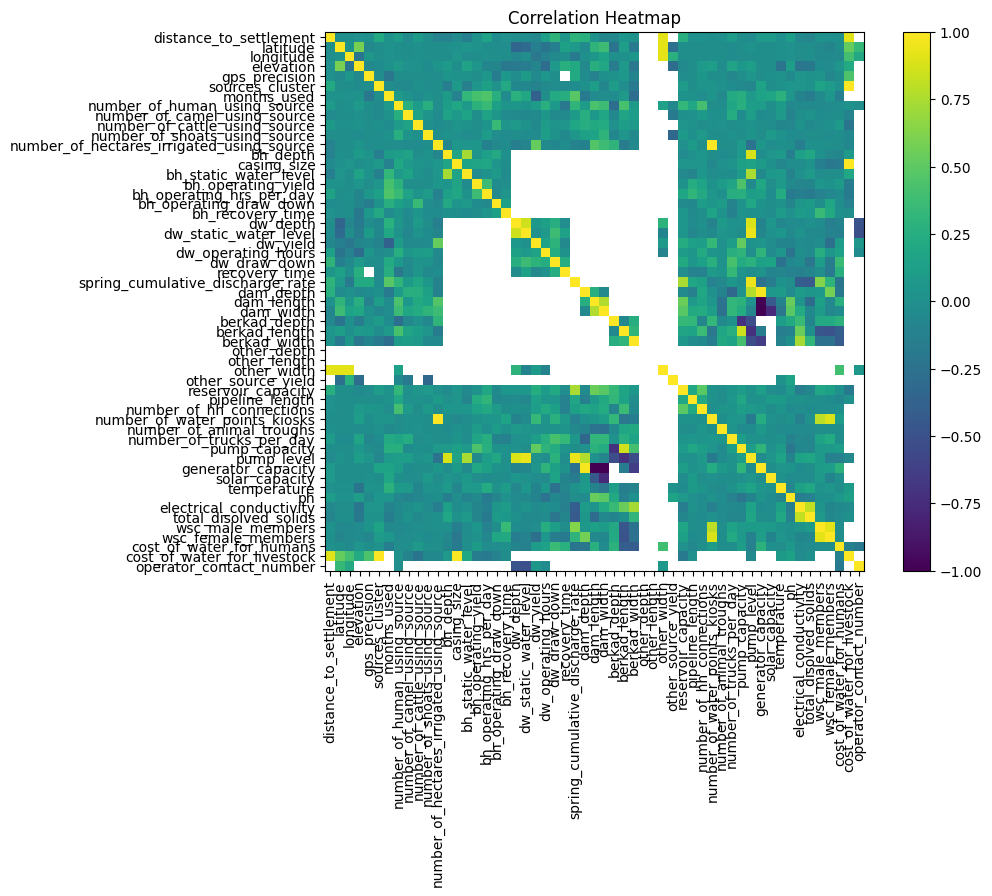

In [30]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,7))
plt.imshow(corr, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


# 🎉 Analysis Completed!

You have now completed:
- Missing values analysis
- Univariate (categorical & numeric)
- Bivariate (categorical vs categorical, numeric vs numeric, numeric vs categorical)
- Multivariate (correlation + PCA)

